#LLoyds Stock Market Analysis
Stock Market Analysis is one of the best usecase interms of Data Science in Finance. So, I want to Analyze the LLoyds stock Market using Python.I used the yfinance API of Yahoo Finance for collecting the stock price data of LLyods.

**LLoyds Stock Market Dataset Since Pandemic**

Here I am downloading the dataset from yfinance. yfinance is a Yahoo Finance, which is one of the most popular websites to collect the stock price data. I am interested to see the stock analysis of the LLoyds bank since Pandemic to till date. To Analyze this data everytime, I have to use the yfinace API, which is provided by Yahoo Finance to collect the latest stock price data. The Yahoo Finance API is installed using the pip command.

In [1]:
!pip install yfinance

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 62 kB 1.7 MB/s 
  Attempting uninstall: requests
    Found existing installation: requests 2.23.0
    Uninstalling requests-2.23.0:
      Successfully uninstalled requests-2.23.0


# Libraries required

In [2]:
import pandas as pd
import yfinance as yf
import datetime 
from datetime import timedelta, date
import plotly.graph_objects as go
import plotly.express as px

In [3]:
# d1 is today's date
d1 = date.today().strftime("%Y-%m-%d")
end_date = d1

#d2 is the start date of the pandemic in UK
d2 = datetime.date(2020,1,31)
start_date = d2.strftime("%Y-%m-%d")

# LLOY.L is the LLoyds banking group in London, United Kingdom

# I don't want to see the downloaded progress, So I put progress= False
data = yf.download('LLOY.L', start=start_date, end=end_date, progress=False)

#First five rows of the data
print(data.head())


                 Open       High        Low      Close  Adj Close     Volume
Date                                                                        
2020-01-31  58.480000  58.480000  56.349998  56.790001  48.708923  179297410
2020-02-03  56.980000  57.200001  56.189999  56.549999  48.503075  153681928
2020-02-04  57.320000  57.590000  56.830002  57.500000  49.317890  113644729
2020-02-05  57.660000  58.327999  57.139999  57.139999  49.009117  194283019
2020-02-06  57.650002  58.270000  56.845001  56.950001  48.846149  142821635


In [4]:
shape = data.shape
shape

(706, 6)

In [5]:
for columns in data.columns:
  print(columns)

Open
High
Low
Close
Adj Close
Volume


Here the shape of the dataframe looks like, it has 7 columns. But it is not true. The shape of the dataframe is (641,6) i.e., 641 rows and 6 columns.Here, Date is not a column, it is the index of this 
dataset. So we have to convert this index into column.






# Converting Date(Index) into Column

In [6]:
data["Date"] = data.index
data = data[["Date", "Open", "High", "Low", "Close", "Adj Close", "Volume"]]

data.reset_index(drop=True, inplace = True)

##drop = True
#If you set drop = True, reset_index will delete the index instead of inserting it back into columns of the df.
#If you set drop = True, the current index will be deleted entirely and the numeric index will replace it.

## inplace = True
# When inplace = True, the data is updated inplace, which means it will return nothing, and df is now updated.

print(data.head())

        Date       Open       High        Low      Close  Adj Close     Volume
0 2020-01-31  58.480000  58.480000  56.349998  56.790001  48.708923  179297410
1 2020-02-03  56.980000  57.200001  56.189999  56.549999  48.503075  153681928
2 2020-02-04  57.320000  57.590000  56.830002  57.500000  49.317890  113644729
3 2020-02-05  57.660000  58.327999  57.139999  57.139999  49.009117  194283019
4 2020-02-06  57.650002  58.270000  56.845001  56.950001  48.846149  142821635


In [7]:
shape = data.shape
shape

(706, 7)

In [8]:
for column in data.columns:
  print(column)

Date
Open
High
Low
Close
Adj Close
Volume


Now date is added as an additional column. That's why the shape of the dataframe is (641,7) 

The candlestick chart is the best place to start whenever you are analyzing the stock market. The candlestick chart can be used to analyze movements in stock prices. Here's how you can visualize the Lloyds stock price chart using candlestick chart.

# Candlesticks

Each candlestick represents a **specific time frame** and gives data about the **price's open,high,low and close** during the period. Standard Candlesticks consist of a **candle body** + **upper and lower wick**.

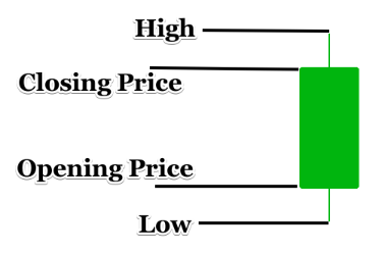

The candle body extends from the opening price to the closing price of an asset for a particular period. The tip of the upper wick of the candle shows the highest price attained during the period. The candle's lower wick starts at the lowest price seen during the period and rises up to the body of the candle.

# Bullish vs. Bearish Candles

Candles are either bullish or bearish depending on the direction of the price during the period they are drawn for.

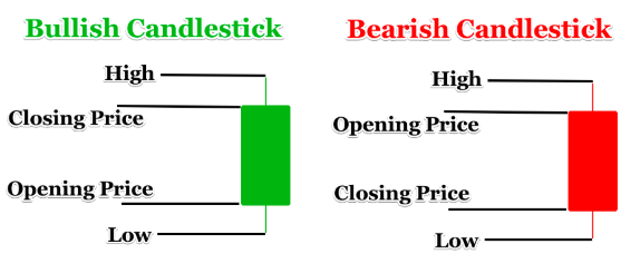

**Bullish Candlestick**

A Bullish candlestick forms when the price opens at a certain level and *closes at a higher price*. This type of candlestick represents a price increase over the period. The default color of a bullish candle stick is green, although white is often used.

**Bearish Candlestick**

A bearish candlesticj forms when the price opens at certain level and *closes at a lower price*. The candlesticj shows a price drop. The default color of the bearish candle is red, but black is also popular.

#Types of Candlestick Patterns

Candles are constructed from 4 prices, specifically the open, high, low and close. They also form different shapes and combinations commonly known as candlestick or candle patterns. Candle patterns can be single, double or triple.

**Single Candle Pattern**

A single candle pattern involves only 1 candlestick. The more famous single candle patterns are
*   Hammers: the hammer, inverted hammer, hanging hammer, hanging man and shooting star
*   Doji
*   Spinning top
*   Spinning Bottom
*   Bullish Marubozu
*   Bearish Marubozu

**Double Candle Pattern**

Double candle patterns consists of two candlesticks. The more famous double candle patterns are
*   Bullish engulfing
*   Bearish engulfing
*   Bullish harami
*   Bearish harami
*   Tweezer top
*   Tweezer Bottom

**Triple Candle Pattern**

Tripe candle patterns are formed from three candlesticks. The more famous triple candle patterns are
*   Morning star
*   Evening star
*   3 white soliders
*   3 black crows

Each candlestick pattern has a specific interpretation that reflects *the attitude of market participants*. The patterns can also provide trading signals since traders are human beings who tend to act similarly in the same situations.

#Doji Candlestick

Doji is a single candle pattern. It is the only candlestick that is neither bearish nor bullish. This is so because the Doji *represents a neutral state where the price closes exactly where it has opened*. For this reason the Doji has no candle body an dit looks like a dash.

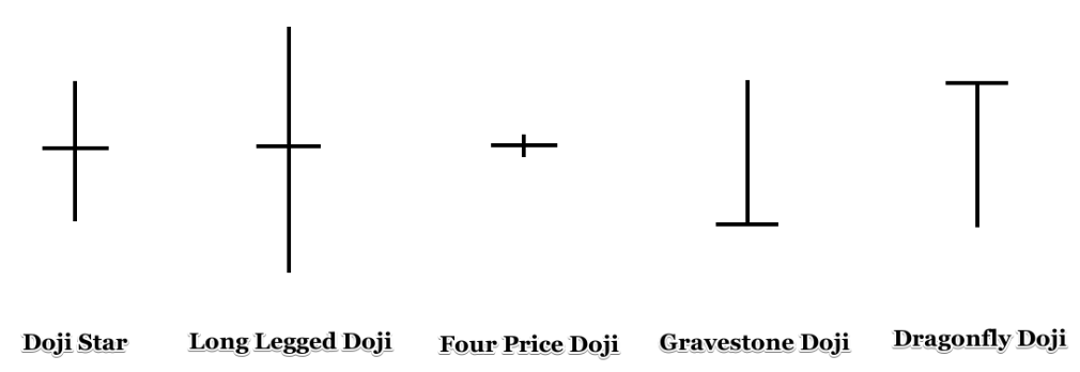

Why is the price closing exactly where it opened? *Because the bullish and bearish pressures in the market have reached equilibrium*. Thus, seeing the *Doji candle will often indicate an upcoming price reversal*.

#Hammer Candlestick Family

The hammer candlestick family also consists of related single candlestick patterns. Hammers have a long upper or lower wick and a small candle body on the oppisite side. Like the Doji, a hammer candlestick pattern indicates that a price reversal might be on its way. Members of the hammer family of candlesticks include the following.

**Hammer**
A hammer candlestick will have a long lower candlewick and a small body in the upper part of the candle. Hammers often show up *during bearish trends* and suggest that the price might soon reverse to the upside.

**Inverted Hammer**
The inverted hammer has a long upper candlewick and a small body in teh lower part of the candle. Same as the hammer, an inverted hammer *appears during bearish trends*. It suugests a price reversal.

**Hanging Man**
The hanging man looks the same as the hammer, but it *appears during bullish trends* and suggests that ac orrect to the downside might soon materialize.

**Shooting Star**
The shooting star has the same structure as the inverted hammer. When it *appears during bullish trends*, it indicates that the recent rise could stop and the market will start correcting lower.

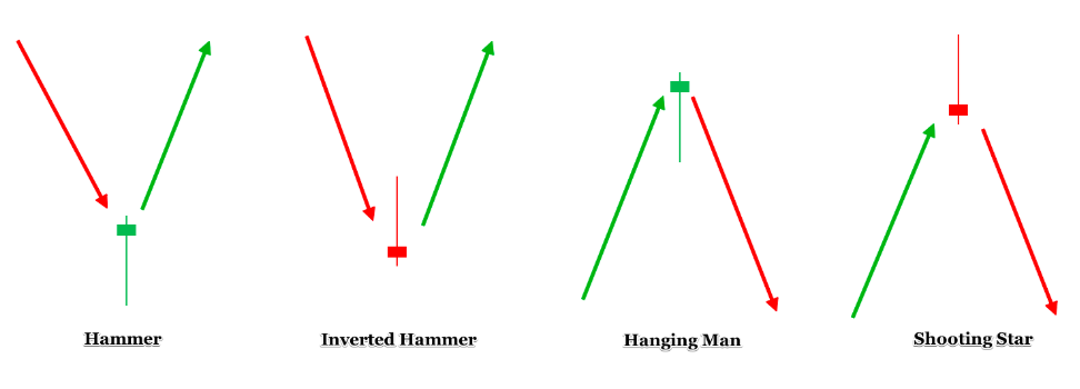

The image will give you a better idea of the hammer candle family. The green arrows represent moves higher, while the red arrows represnt price declines.

As we can see, the candle might look the same but the previous trend and its direction give different signals. Notice that each candle pattern in the hammer family is a reversal pattern that could be bearish or bullish depending on what directional move preceded it.

#Engulfing Candlestick Patterns

Engulfing candlestick patterns are double candle patterns. They consist of a random candle and another bigger candle that fully encompasses or engulfs the price action contained within the first.

**Bullish Engulfing Pattern**
The bullish engulfing pattern appears during bullish trends. It consists of a bullish candle, follwed by a bearish candle that engulfs the first candle. This pattern indicates a bearish move may soon be forthcoming.
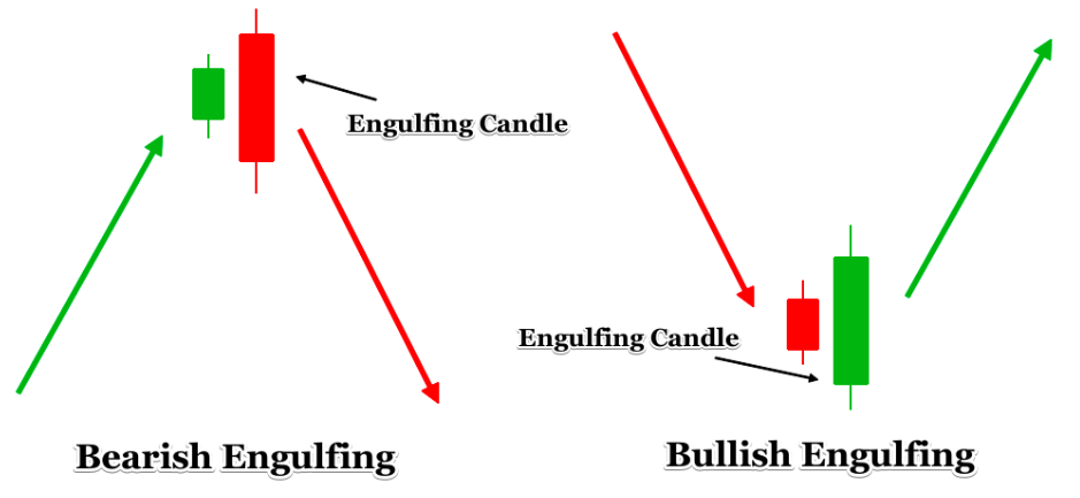

#Morning and Evening Star Candlestick Patterns
The morning and the evening star are triple candle patterns. They also forecast reversals.

**Morning Star**
The morning star pattern *occurs duing bearish trends and signals an upside reversal*. It starts with a bearish candle and is followed by a small bearish or bullish candle that gaps down. Then the proce gaps up and forms a bigger bullish candle. The third candle of the pattern should cover at least half the body size of the first candle.

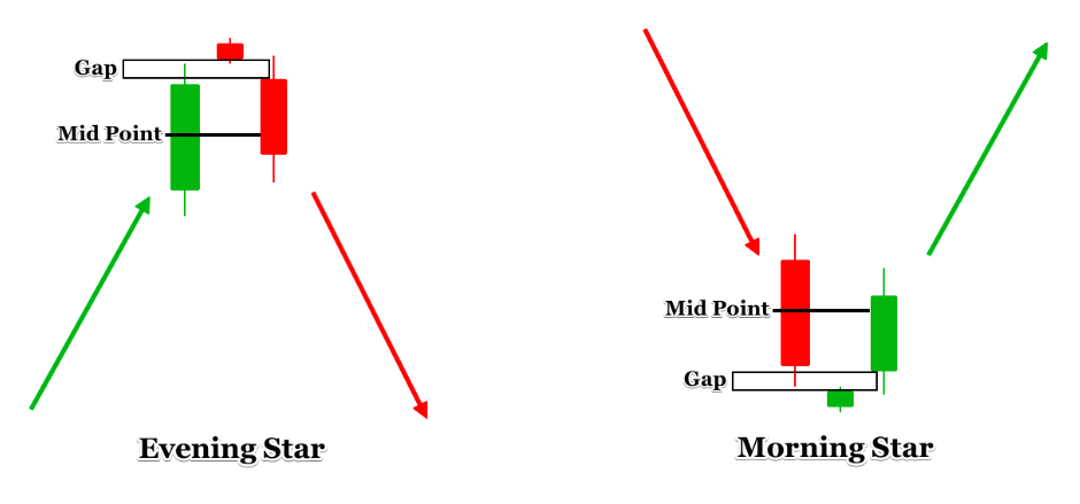

**Evening Star**
The evening star is the opposite of the morning star. It *appears during bullish trends and signals a downside reversal*. The pattern starts with a bullish candle, followed by a sall bearish or bullish candle that gaps up. Then the price gaps down and forms a bigger bearish candle. The candle should cover at least half the body size of the first candle.













In [9]:
figure = go.Figure(data=[go.Candlestick(x=data["Date"], open=data["Open"], high=data["High"], low=data["Low"], close=data["Close"])])

figure.update_layout(title = "LLoyds Stock Price Analysis Since Pandemic", xaxis_rangeslider_visible=False)

figure.show()

**Rangeslider**

The rangeslider shows a range and a preview of the chart; the slider itself indicates which part of the chart to display, and the size of the display. Drag the slider right or left to display a different range of data.

In [10]:
figure = go.Figure(data=[go.Candlestick(x=data["Date"], open=data["Open"], high=data["High"], low=data["Low"], close=data["Close"])])

figure.update_layout(title = "Candlestick Chart of LLoyds Stock Price Analysis Since Pandemic", xaxis_rangeslider_visible=True)

figure.show()

**Time Period Selectors**


Another interactive featue we can add for stock market analysis is the time period selctors. Tim period selctors are like buttons that show you the graph of a specific time period. 

Here is how we can add buttons for selecting the time period for stock market analysis.

**Excluding Weekends**

The weekend or Holiday season always affects the stock market. So, If we want to remove all the records of the weekend trend from our stock market visualization, below is how we can do it.

In [11]:
figure = go.Figure(data=[go.Candlestick(x=data["Date"], open=data["Open"], high=data["High"], low=data["Low"], close=data["Close"])])
# Excluding Weekends
figure.update_xaxes(
    rangebreaks=[ 
        dict(bounds=["sat","mon"]),
        dict(values=["2020-01-31", "2022-08-31"])
    ]
)

figure.update_layout(title = "CandleStick Chart of LLoyds Stock Price Analysis with Time Period Selectors and hiding weekend gaps", xaxis_rangeslider_visible=True)

#Time Period Selectors
figure.update_xaxes(
    rangeselector=dict(
        buttons=list([
            dict(count=1, label='1d', step='day',stepmode = 'backward'),
            dict(count=1, label='1m', step='month', stepmode ='backward'),
            dict(count=3, label='3m', step='month', stepmode='backward'),
            dict(count=6, label='6m', step='month', stepmode='backward'),
            dict(count=1, label='1y', step='year', stepmode='backward'),
            dict(count=1.5, label='1.5y', step='year', stepmode='backward'),
            dict(count=2, label='2y', step='year', stepmode='backward'),
            dict(step="all")

        ])
    )
)



figure.show()

#Bar Charts

Bar charts allows traders to anlayze trends, spot potential trend reversals, and monitor volatility and price movements. Traders and investors decide which period they want to analyze.

Here is how to visualize LLoyds's stock price using a bar plot to analyze the stock market, especially in the long run.

In [12]:
figure = px.bar(data, x = "Date", y="Close", title = "Bar chart of LLoyds stock price analysis Since Pandemic")
figure.update_xaxes(rangeslider_visible=True)
figure.show()

In [13]:
figure = px.bar(data, x = "Date", y="Close", title = "Bar chart of LLoyds stock price analysis with Time Period Selectors and hiding weekend gaps")
# Excluding Weekends
figure.update_xaxes(
    rangebreaks=[ 
        dict(bounds=["sat","mon"]),
        dict(values=["2020-01-31", "2022-08-31"])
    ]
)

figure.update_layout(xaxis_rangeslider_visible=True)

#Time Period Selectors
figure.update_xaxes(
    rangeselector=dict(
        buttons=list([
            dict(count=1, label='1d', step='day',stepmode = 'backward'),
            dict(count=1, label='1m', step='month', stepmode ='backward'),
            dict(count=3, label='3m', step='month', stepmode='backward'),
            dict(count=6, label='6m', step='month', stepmode='backward'),
            dict(count=1, label='1y', step='year', stepmode='backward'),
            dict(count=1.5, label='1.5y', step='year', stepmode='backward'),
            dict(count=2, label='2y', step='year', stepmode='backward'),
            dict(step="all")

        ])
    )
)



figure.show()


#Line Chart

A line chart provides traders with a visualization of where the price of a security has travelled over a given period. Because line charts usually only use closing prices, they reduce noise from less critical times in the trading day, such as open, high and lo prices.

In [14]:
figure = px.line(data, x = "Date", y='Close', title = 'Line chart for LLoyds Stock Market Analysis with Rangeslider')
figure.update_xaxes(rangeslider_visible=True) 
figure.show()

In [15]:
figure = px.line(data, x="Date", y="Close", title='Line chart for Lloyds Stock Market Analysis with Time period selectors and Hiding weekend gaps')

# Excluding Weekends
figure.update_xaxes(
    rangebreaks=[ 
        dict(bounds=["sat","mon"]),
        dict(values=["2020-01-31", "2022-08-31"])
    ]
)

figure.update_layout(xaxis_rangeslider_visible=True)

figure.update_xaxes(
    rangeselector=dict(
        buttons=list([
            dict(count=1, label='1d', step='day',stepmode = 'backward'),
            dict(count=1, label='1m', step='month', stepmode ='backward'),
            dict(count=3, label='3m', step='month', stepmode='backward'),
            dict(count=6, label='6m', step='month', stepmode='backward'),
            dict(count=1, label='1y', step='year', stepmode='backward'),
            dict(count=1.5, label='1.5y', step='year', stepmode='backward'),
            dict(count=2, label='2y', step='year', stepmode='backward'),
            dict(step="all")
  
        ])
    )
)
figure.show()

#Scatter plot

A scatter Analysis is used when you need to compare two data sets against each other to see if there is a relationship. Scatter plots are a way of visalizing the relationship by plotting the data points you get a scattering of points on a graph.

The Closer the data points come to forming a straight line when plotted, the higher the correaltion between the two variables, or the stronger the relationship. 

In [16]:
figure = px.scatter (data, x = "Date", y='Close', title = 'Scatter Plot of LLoyds Stock Market Analysis with Rangeslider')
figure.update_xaxes(rangeslider_visible=True) 
figure.show()

In [17]:
figure = px.scatter(data, x="Date", y="Close", title='Scatter Plot of Lloyds Stock Market Analysis with Time period selectors and Hiding weekend gaps')

# Excluding Weekends
figure.update_xaxes(
    rangebreaks=[ 
        dict(bounds=["sat","mon"]),
        dict(values=["2020-01-31", "2022-08-31"])
    ]
)

figure.update_layout(xaxis_rangeslider_visible=True)

figure.update_xaxes(
    rangeselector=dict(
        buttons=list([
            dict(count=1, label='1d', step='day',stepmode = 'backward'),
            dict(count=1, label='1m', step='month', stepmode ='backward'),
            dict(count=3, label='3m', step='month', stepmode='backward'),
            dict(count=6, label='6m', step='month', stepmode='backward'),
            dict(count=1, label='1y', step='year', stepmode='backward'),
            dict(count=1.5, label='1.5y', step='year', stepmode='backward'),
            dict(count=2, label='2y', step='year', stepmode='backward'),
            dict(step="all")
  
        ])
    )
)
figure.show()

#Summary

These are the ways we can analyze the stock market interactively using Python programming language. Based on the current and historic trends of the stock market to make future buying and selling decisions. 